# Airbnb Listings Bangkok — Data Understanding & Cleaning

This notebook is prepared for **data understanding** and **data cleaning**
on the *Airbnb Listings Bangkok* dataset based on the data dictionary.

* * *



### Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Set default plot style
sns.set(style="whitegrid")

In [ ]:
file_path = "Airbnb Listings Bangkok.csv"
df = pd.read_csv(file_path)

print("Shape:", df.shape)
display(df.head(),df.tail())


Shape: (15854, 17)


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [ ]:
# Basic info about dataset
print(f'The number of rows and columns in the dataset df is {df.shape}')
df.info()

The number of rows and columns in the dataset df is (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews            

In [ ]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [ ]:
pd.set_option('display.max_colwidth', None)

# Unique data in each column
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabellDesc = pd.DataFrame(listItem,
                          columns=['Column Name', 'Number of Unique', 'Unique Sample'])

tabellDesc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

In [ ]:
# Numerical descriptive statistics
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15854.0,7.926500e+03,4.576800e+03,0.00000,3.963250e+03,7.926500e+03,1.188975e+04,1.585300e+04
id,15854.0,1.579397e+17,2.946015e+17,27934.00000,2.104509e+07,3.503734e+07,5.256154e+07,7.908162e+17
host_id,15854.0,1.541058e+08,1.318726e+08,58920.00000,3.974431e+07,1.224556e+08,2.390547e+08,4.926659e+08
latitude,15854.0,1.374514e+01,4.303957e-02,13.52730,1.372009e+01,1.373849e+01,1.375950e+01,1.395354e+01
longitude,15854.0,1.005599e+02,5.091058e-02,100.32955,1.005297e+02,1.005614e+02,1.005851e+02,1.009234e+02
price,15854.0,3.217704e+03,2.497212e+04,0.00000,9.000000e+02,1.429000e+03,2.429000e+03,1.100000e+06
minimum_nights,15854.0,1.529236e+01,5.081502e+01,1.00000,1.000000e+00,1.000000e+00,7.000000e+00,1.125000e+03
number_of_reviews,15854.0,1.665416e+01,4.061333e+01,0.00000,0.000000e+00,2.000000e+00,1.300000e+01,1.224000e+03
reviews_per_month,10064.0,8.131449e-01,1.090196e+00,0.01000,1.200000e-01,4.350000e-01,1.060000e+00,1.913000e+01
calculated_host_listings_count,15854.0,1.388962e+01,3.026985e+01,1.00000,1.000000e+00,4.000000e+00,1.300000e+01,2.280000e+02


### Missing Value

In [ ]:
# Missing values in number and percentage
missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent.round(2)})

missing_df

,Missing Values,Percentage (%)
reviews_per_month,5790,36.52
last_review,5790,36.52
name,8,0.05
host_name,1,0.01
Unnamed: 0,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
id,0,0.00
host_id,0,0.00
room_type,0,0.00


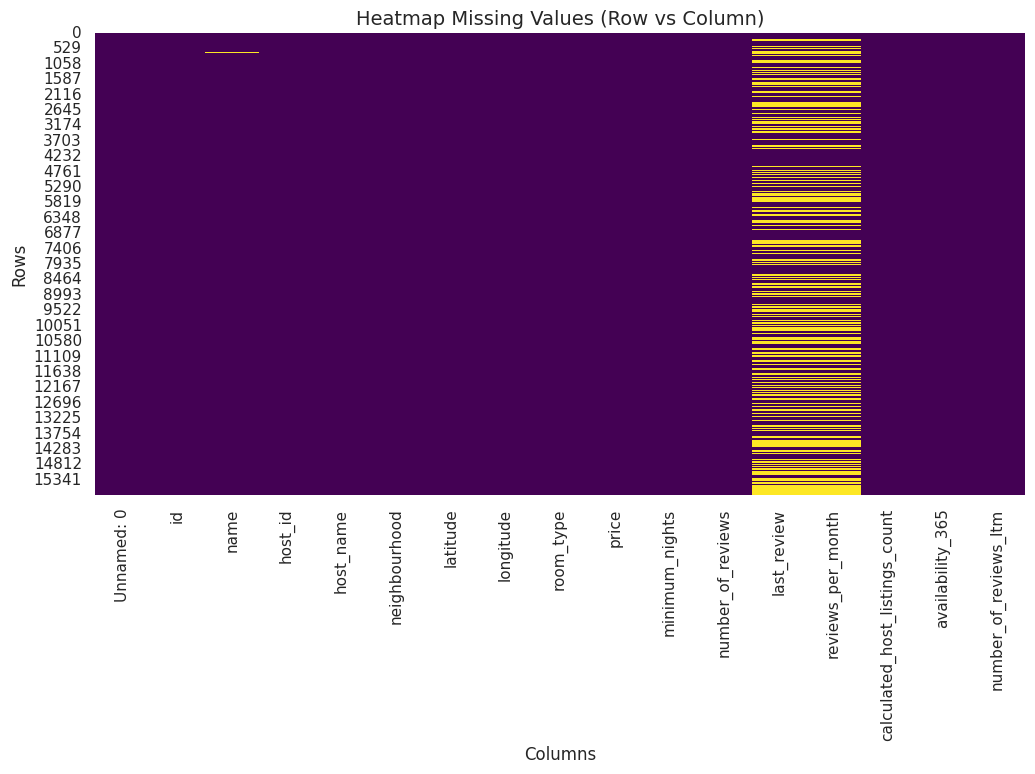

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),
            cbar=False,
            cmap="viridis")  # yellow/green = missing
plt.title("Heatmap Missing Values (Row vs Column)", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

<Axes: >

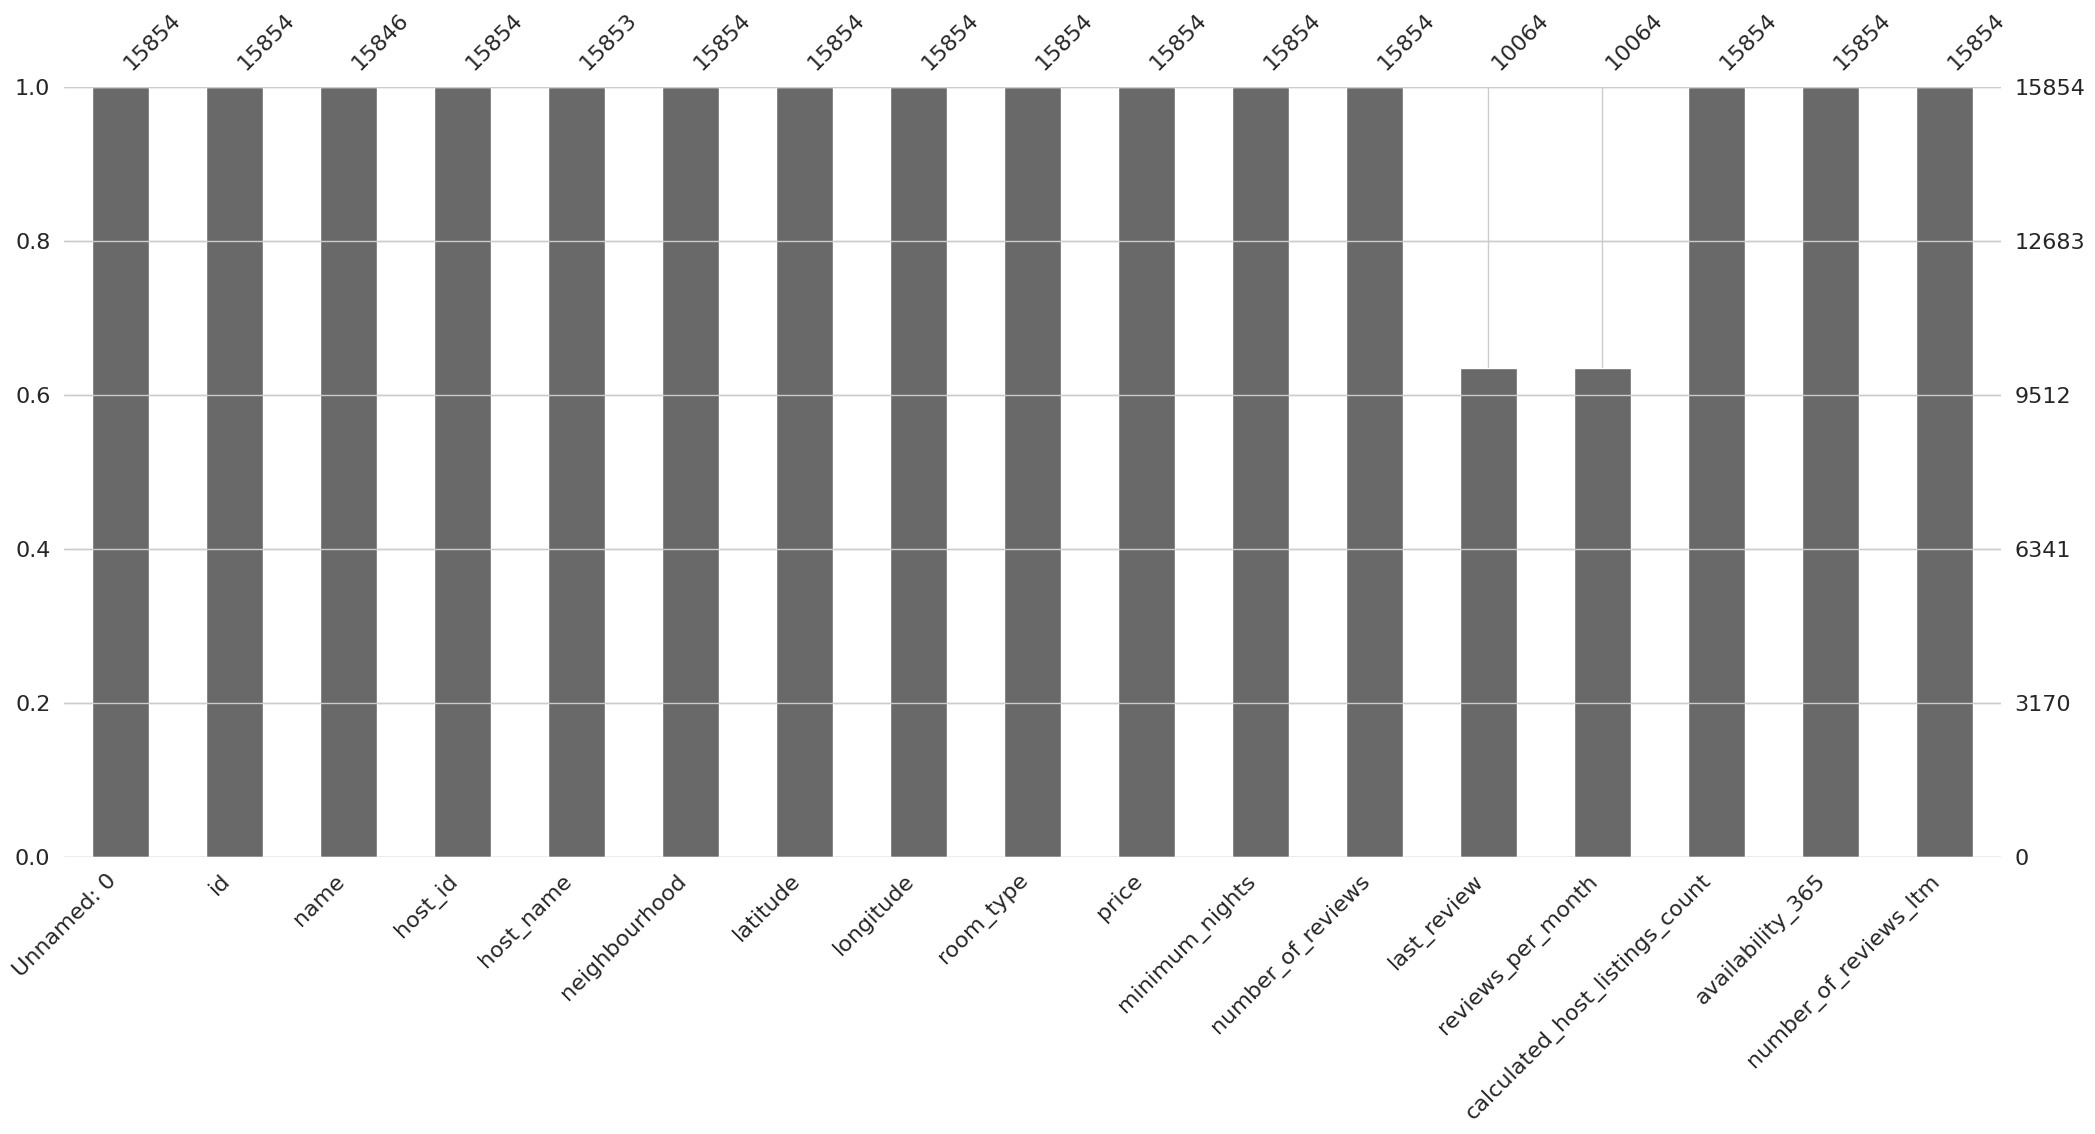

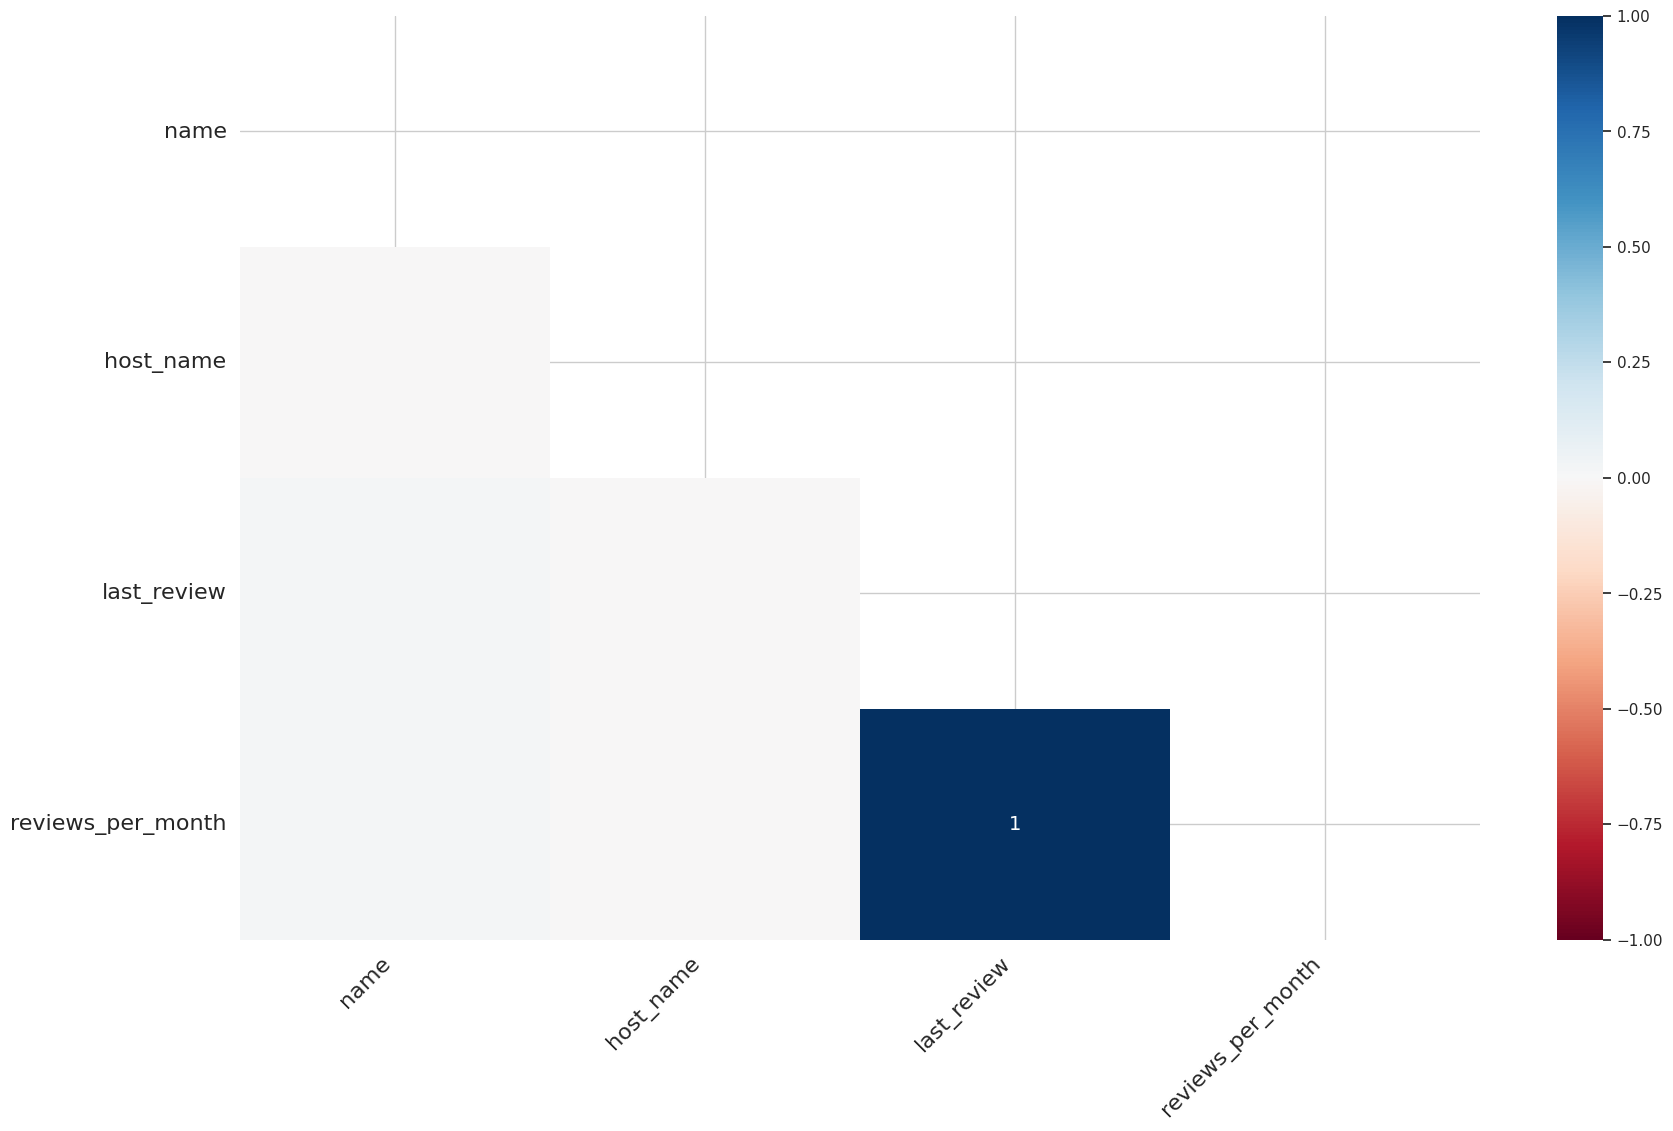

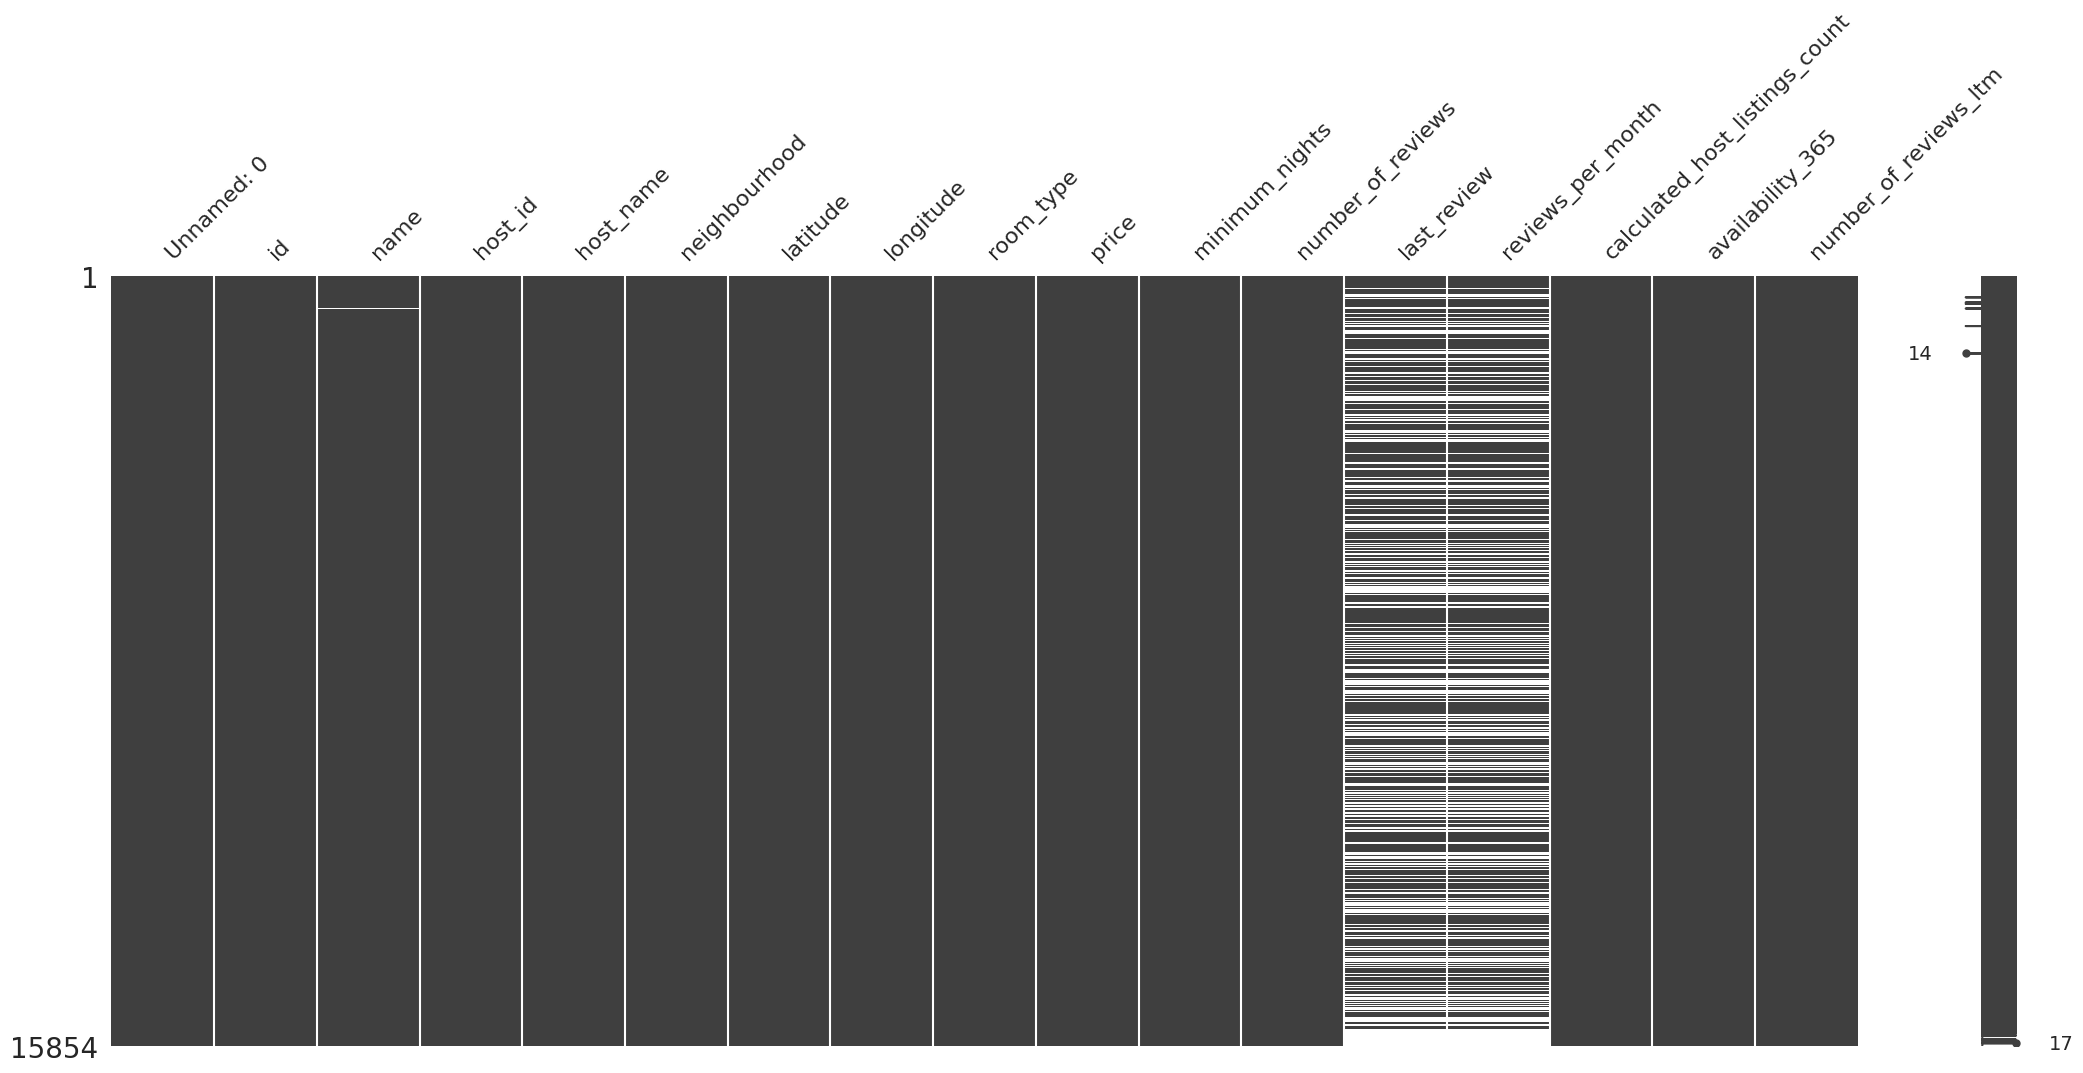

In [ ]:
import missingno as msno
# Bar chart missing
msno.bar(df)

# Heatmap correlation missingness
msno.heatmap(df)

# Missing values in number and percentage
msno.matrix(df)

In [ ]:
df.loc[df['reviews_per_month'].isna(), 'last_review'] \
  .value_counts(dropna=False)

,count
last_review,
NaN,5790


In [ ]:
pd.crosstab(
    df['reviews_per_month'].isna(),
    df['last_review'].isna(),
    rownames=['reviews_per_month_isna'],
    colnames=['last_review_isna'],
    margins=True
)

last_review_isna,False,True,All
reviews_per_month_isna,,,
False,10064,0,10064
True,0,5790,5790
All,10064,5790,15854


In [ ]:
pd.crosstab(
    df['reviews_per_month'].isna(),
    df['last_review'].isna(),
    normalize='index'
).round(3)

last_review,False,True
reviews_per_month,,
False,1.0,0.0
True,0.0,1.0




*   If reviews_per_month has data (False) → then last_review also has data (False) (100%).
*   If reviews_per_month is missing (True) → then last_review is also missing (True) (100%).



```
conclusion:
* Missing values in both columns always come in pairs.
* Business interpretation: if a listing has no reviews at all, then:
	•	reviews_per_month = NaN → can be considered as 0
	•	last_review = NaT → means there has never been a review
```





In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# last_review can remain NaT (meaning "no reviews yet")

In [ ]:
# Add a flag to indicate whether a listing has ever been reviewed
df["has_review"] = np.where(df["number_of_reviews"] > 0, 1, 0)

# Create a summary of the number of listings
summary = df["has_review"].value_counts().rename_axis("Has Review").reset_index(name="Count")

# Add percentage
summary["Percentage (%)"] = (summary["Count"] / len(df) * 100).round(2)

summary

,Has Review,Count,Percentage (%)
0,1,10064,63.48
1,0,5790,36.52


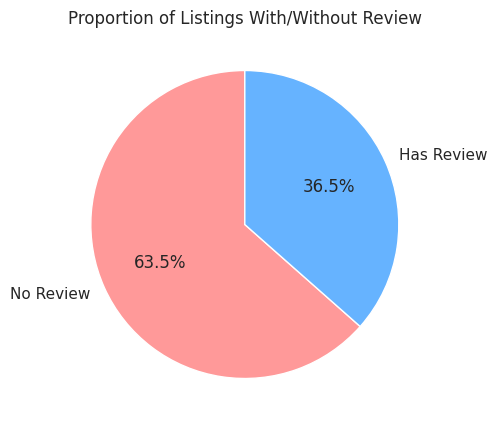

In [ ]:
summary.set_index("Has Review")["Count"].plot.pie(
    autopct="%.1f%%", labels=["No Review", "Has Review"],
    colors=["#ff9999","#66b3ff"], figsize=(5,5), startangle=90
)
plt.ylabel("")
plt.title("Proportion of Listings With/Without Review")
plt.show()

### Duplicate

In [ ]:
# Check for duplicate listing IDs
df.duplicated(subset=["id"]).sum()

np.int64(0)

In [ ]:
# Drop unnecessary columns
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])
df.shape

(15854, 17)

In [ ]:
# Convert data types
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")
numeric_cols = ["id", "host_id", "price", "minimum_nights",
                "number_of_reviews", "calculated_host_listings_count",
                "availability_365", "number_of_reviews_ltm"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64
minimum_nights,int64


In [ ]:
# Handle outliers for the price column using the IQR method
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

print("Price bounds:", lower_bound, upper_bound)
df["price"] = df["price"].clip(lower=lower_bound, upper=upper_bound)
df["price"].describe()

Price bounds: -3687.0 7016.0


,price
count,15854.000000
mean,1986.910243
std,1648.831924
min,0.000000
25%,900.000000
50%,1429.000000
75%,2429.000000
max,7016.000000


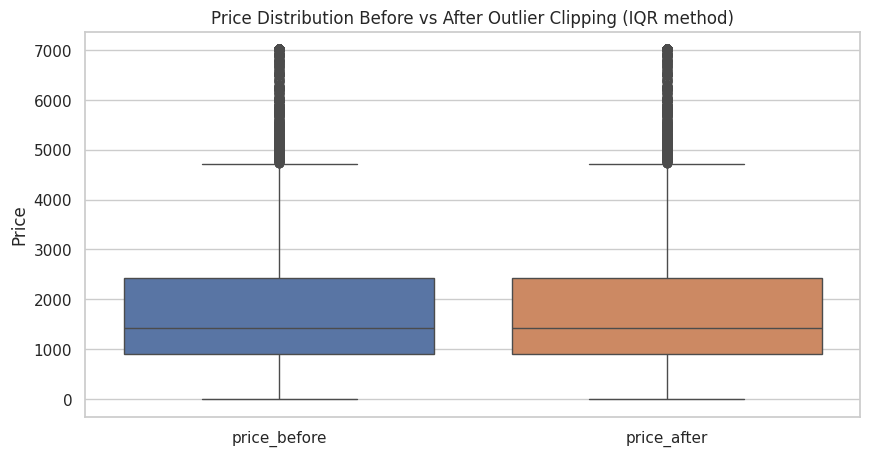

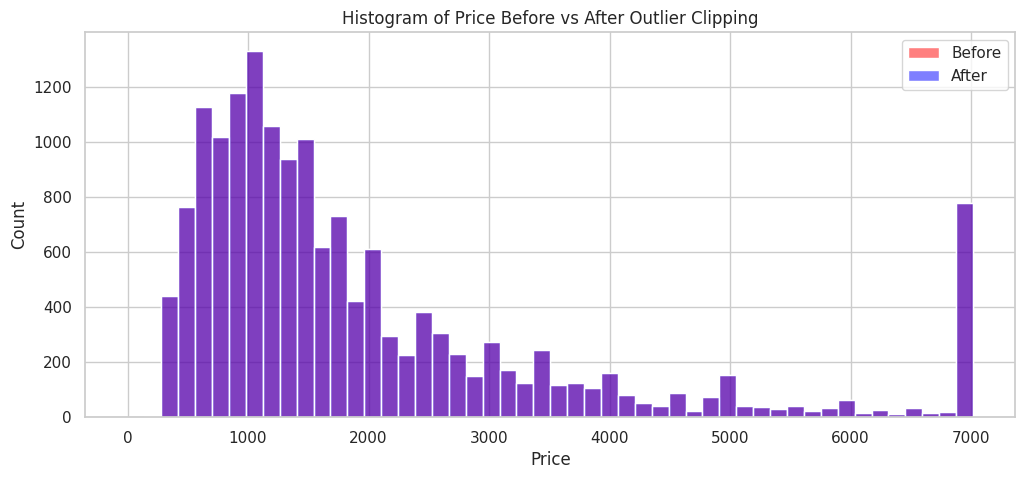

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Save price before clipping
df["price_before"] = df["price"].copy()

# Calculate IQR bounds
Q1 = df["price_before"].quantile(0.25)
Q3 = df["price_before"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Create price_after column with clipping
df["price_after"] = df["price_before"].clip(lower=lower_bound, upper=upper_bound)

# Boxplot before vs after
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["price_before","price_after"]])
plt.title("Price Distribution Before vs After Outlier Clipping (IQR method)")
plt.ylabel("Price")
plt.show()

# Histogram comparison
plt.figure(figsize=(12,5))
sns.histplot(df["price_before"], bins=50, color="red", alpha=0.5, label="Before")
sns.histplot(df["price_after"], bins=50, color="blue", alpha=0.5, label="After")
plt.legend()
plt.title("Histogram of Price Before vs After Outlier Clipping")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [ ]:
# Feature Engineering
df["occupancy_rate"] = 1 - (df["availability_365"] / 365)
df["days_since_last_review"] = (pd.Timestamp.today().normalize() - df["last_review"]).dt.days
df.loc[df["last_review"].isna(), "days_since_last_review"] = np.nan
df["host_tier"] = np.where(df["calculated_host_listings_count"] > 1, "multi", "single")

df[["occupancy_rate", "days_since_last_review", "host_tier"]].head()


,occupancy_rate,days_since_last_review,host_tier
0,0.032877,2079.0,multi
1,0.019178,NaN,multi
2,0.000000,NaN,single
3,0.115068,1263.0,single
4,0.000000,NaN,multi


Interpretation:
	•	Row 0 → occupancy 3.2% (very low), last review 2050 days ago (-5.6 years), host type multi.
	•	Row 1 → occupancy 1.9%, never reviewed (NaN), host multi.
	•	Row 3 → occupancy 11.5%, last reviewed 1234 days ago (~3.4 years), host single.
	•	Many values in days_since_last_review = NaN → means never reviewed at all.

⸻

✅ Conclusion:
	•	occupancy_rate = proxy for occupancy level.
	•	days_since_last_review = age of last review activity.
	•	host_tier = host category (single vs multi).
	•	This feature engineering enriches the dataset for analyzing Q6–Q9 (price, demand, host profile).

In [ ]:
# Save cleaned dataset
output_path = "Airbnb Bangkok Listings (clean).csv"
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")


Cleaned data saved to Airbnb Bangkok Listings (clean).csv


In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15854, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,15854,"[36589240, 575064111761236848]"
1,name,object,8,14794,"[Five artist loft apartments, Stay Monomer, the ideal location (12 Mixed) 04]"
2,host_id,int64,0,6659,"[45129608, 125542554]"
3,host_name,object,1,5312,"[Mint, Tawtongtot]"
4,neighbourhood,object,0,50,"[Bang Rak, Ratchathewi]"
5,latitude,float64,0,9606,"[13.722115, 13.72449]"
6,longitude,float64,0,10224,"[100.63334, 100.52942]"
7,room_type,object,0,4,"[Shared room, Hotel room]"
8,price,int64,0,2625,"[3728, 5393]"
9,minimum_nights,int64,0,86,"[4, 22]"
